![resources/images/dhlab-logo-nb.png](../resources/images/dhlab-logo-nb.png)

# Sammenlign metadata

In [1]:
from dhlab.api.dhlab_api import get_document_frequencies
from dhlab import Corpus, Counts, totals
import dhlab.nbtext as nb

## Undersøk korpus med metadata

En viktig metode i undersøkelse av metadata og tekster er grafer og nettverk. 

Metadata er alt som er om teksten, fra forfatter til forlag. Også innholdsord kan sees på som metadata.

### Bygg korpus

Korpuset defineres med metadata som dewey, emneord, navn , år, etc. Her kan [Webdewey](http://deweysearchno.pansoft.de/webdeweysearch/index.html) være til god hjelp.

Se eksempelfil om [Korpusbygging](https://nbviewer.jupyter.org/github/DH-LAB-NB/DHLAB/blob/master/1_Bygg_korpus.ipynb) for ulike måter å definere korpus.

In [2]:
bøker = Corpus(
   doctype="digibok",
   freetext="krig OR krigen OR soldater",
   from_year=1950,
   to_year=2010,
   ddk="9%",
   lang='nob',
   limit=300
)

In [3]:
bøker.frame.loc[:, ["title", "authors", "year"]]

,title,authors,year
0,Tapte år : tilegnet Alma,"Pasjkurov , Ivan",1990
1,Hvis Hitler hadde vunnet krigen : nazistenes p...,"Giordano , Ralph / Seljelid , Åge",1991
2,Barn under krigen,"Nøkleby , Berit / Hjeltnes , Guri / Gullvåg , ...",2000
3,De Nære årene : norske kvinner og menn fortell...,"Jensen , Johan O. / Jensen , Johan O.",1986
4,Men arbeidet måtte gå : vegfolk forteller om k...,"Hegdalstrand , Kjell",1995
...,...,...,...
161,Over grensen ? : Hjemmefrontens likvidasjoner ...,"Moland , Arnfinn",1999
162,Russisk rulett,"Bočarov , Gennadij / Fremming , Espen",1990
163,I Tordenskiolds kjølvann,"Kavli , Guthorm",1990
164,Norsk krigsleksikon 1940-45,"Dahl , Hans Fredrik / Hagen , Eirin",1995


### Undersøk forskjeller
#### Undersøk forskjeller internt i korpuset

Her samler vi sammen alle bøkene i korpus og summerer. Men først la oss se på en del av korpuset som en dokument term matrise

In [4]:
# tar de fem første og henter frekvensene for alle bøkene

bøker_dtm = Counts(bøker.head(5))

In [5]:
bøker_dtm 

,100521520,100571027,100570822,100025743,100285115
.,5199.0,3537.0,2521.0,6114.0,5406.0
",",3362.0,2252.0,1424.0,3108.0,6932.0
og,2090.0,1805.0,1001.0,3185.0,3443.0
var,1989.0,1198.0,962.0,1396.0,1837.0
i,1841.0,1150.0,891.0,3010.0,3245.0
...,...,...,...,...,...
Mona,0.0,0.0,0.0,0.0,36.0
fait,0.0,0.0,0.0,0.0,40.0
‘,0.0,0.0,0.0,0.0,70.0
’,0.0,0.0,0.0,0.0,95.0


#### Visualiser med varmekart
Et varmekart gjør det enklere å få øye på likhet og variasjon i tallene.

In [6]:
nb.heatmap(bøker_dtm.frame.head(10), color="#045599")

,100521520,100571027,100570822,100025743,100285115
.,5199.000000,3537.000000,2521.000000,6114.000000,5406.000000
",",3362.000000,2252.000000,1424.000000,3108.000000,6932.000000
og,2090.000000,1805.000000,1001.000000,3185.000000,3443.000000
var,1989.000000,1198.000000,962.000000,1396.000000,1837.000000
i,1841.000000,1150.000000,891.000000,3010.000000,3245.000000
det,1783.000000,778.000000,683.000000,2044.000000,1304.000000
jeg,1333.000000,695.000000,661.000000,111.000000,358.000000
på,1302.000000,891.000000,556.000000,1180.000000,1527.000000
som,1271.000000,725.000000,516.000000,1731.000000,1253.000000
en,1269.000000,779.000000,517.000000,1549.000000,1154.000000


### Undersøk forskjeller med frekvenser fra bokhylla
Vi teller opp tokens i korpuset med `Counts`. Dette kan ta litt tid.

In [7]:
count_corpus = Counts(bøker)

**Referansekorpus** Kommandoen under lager et referansekorpus av de 150 000 vanligste tokenene i vår samling.

In [8]:
totals = totals(150000)

In [9]:
# Summer tokens fra korpus
bøker_total = count_corpus.frame.sum(1).to_frame("count")

In [10]:
# Frekvensliste for korpus
bøker_total

,count
",",1447361.0
.,1239985.0
^,19453.0
og,456573.0
til,271849.0
...,...
Lovell,21.0
Oldereid,29.0
ZJIZJIN,45.0
BELJAEV,47.0


For å lette arbeidet med å tolke forskjeller normaliserer vi frekvensene til tall mellom 0 og 1.

In [11]:
nb.normalize_corpus_dataframe(totals)
nb.normalize_corpus_dataframe(bøker_total)

True

In [12]:
forskjell = bøker_total.loc[:, "count"] / totals.freq

In [13]:
bøker_typiske_ord = forskjell.sort_values(ascending=False).to_frame("ratio")

In [14]:
bøker_typiske_ord.head(50)

,ratio
løsl,4833.190733
ovf.,4008.252579
f.nr,3966.797430
Møllergata,755.385017
Østf,677.497177
Sachsenhausen,450.341807
Grini,393.216739
Falstad,341.167553
Hedm,311.771917
Telem,301.856473


## Visualiser som ordsky

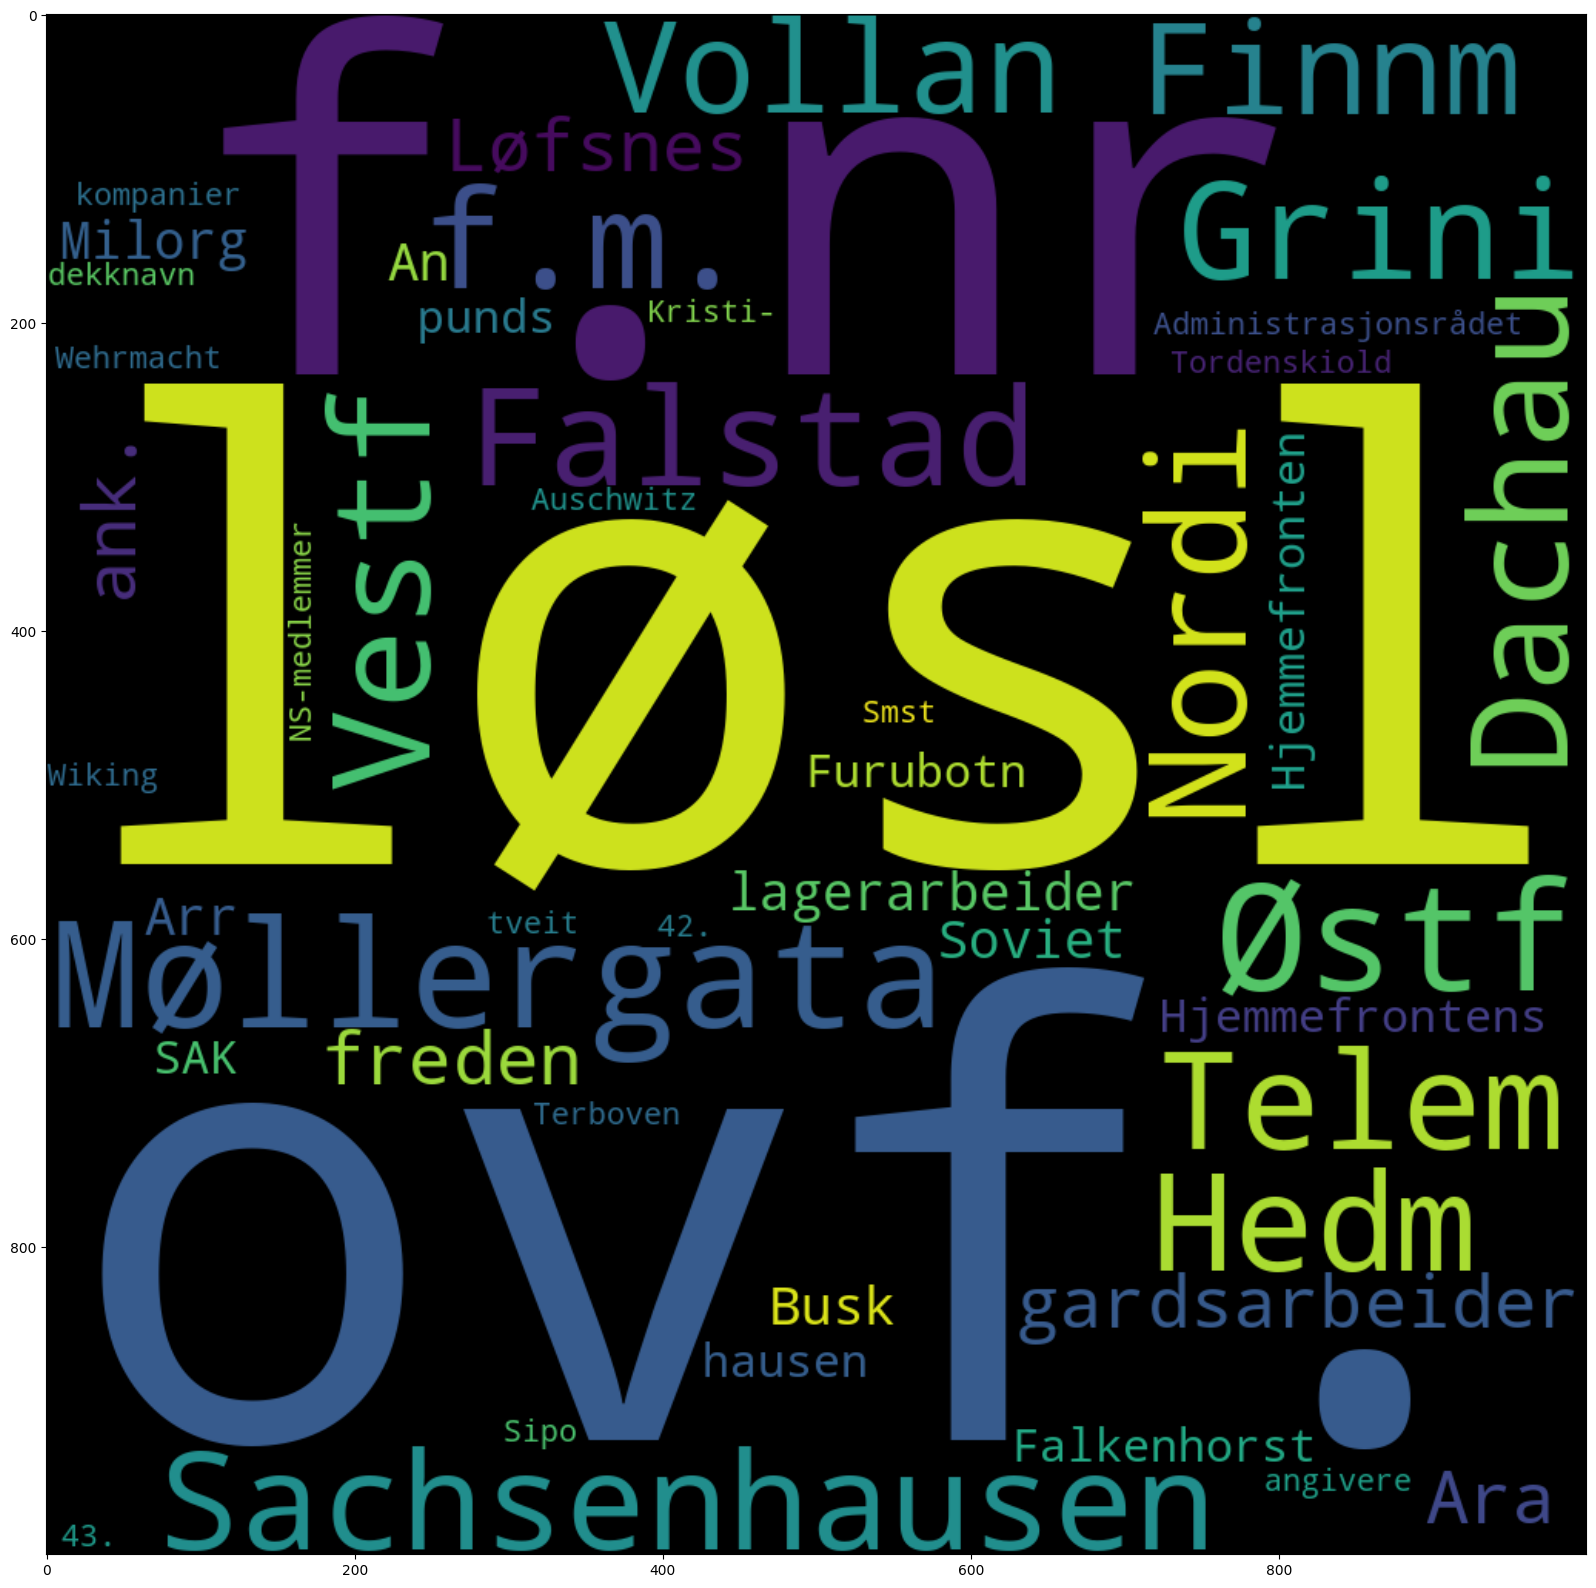

In [15]:
nb.cloud((bøker_typiske_ord/bøker_typiske_ord.sum()).head(50))